# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
#Função para tratar o DataFrame
def filter (df):
    df = df.drop(['Unnamed: 0', 'index'], axis = 1)
    df_new = df.dropna().reset_index(drop=True)
    return df_new

In [62]:
#Leitura do DataFrame
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [200]:
#Tratamento do DataFrame
previsao_renda_filter = filter(previsao_renda)
previsao_renda_filter.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [68]:
#Tabela de metadados para facilitar visualização
metadados = pd.DataFrame({'dtypes': previsao_renda_filter.dtypes})
metadados['missing'] = previsao_renda_filter.isna().sum()
metadados['valores_unicos'] = previsao_renda_filter.nunique()

metadados

,dtypes,missing,valores_unicos
data_ref,object,0,15
sexo,object,0,2
posse_de_veiculo,bool,0,2
posse_de_imovel,bool,0,2
qtd_filhos,int64,0,8
tipo_renda,object,0,5
educacao,object,0,5
estado_civil,object,0,5
tipo_residencia,object,0,6
idade,int64,0,46


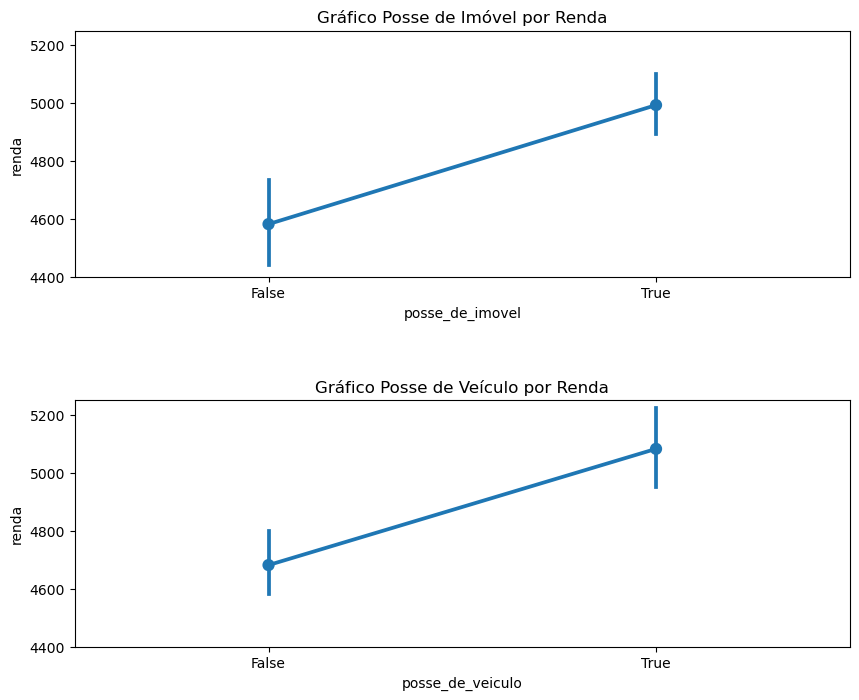

In [168]:
#Gráficos Posse Imóvel e Posse Veículo
fig, ax = plt.subplots(2,1, figsize=(10,8))

imovel = sns.pointplot(x='posse_de_imovel', y='renda',
                       data=previsao_renda_filter, 
                       dodge=True, 
                       errorbar=('ci', 95), 
                       ax= ax[0])

veiculo = sns.pointplot(x='posse_de_veiculo', y='renda',
                        data=previsao_renda_filter, 
                        dodge=True, 
                        errorbar=('ci', 95), 
                        ax= ax[1])

imovel.set_title('Gráfico Posse de Imóvel por Renda')
imovel.set_ylim(4400, 5250)
veiculo.set_title('Gráfico Posse de Veículo por Renda')
veiculo.set_ylim(4400, 5250)

plt.subplots_adjust(hspace=0.5)

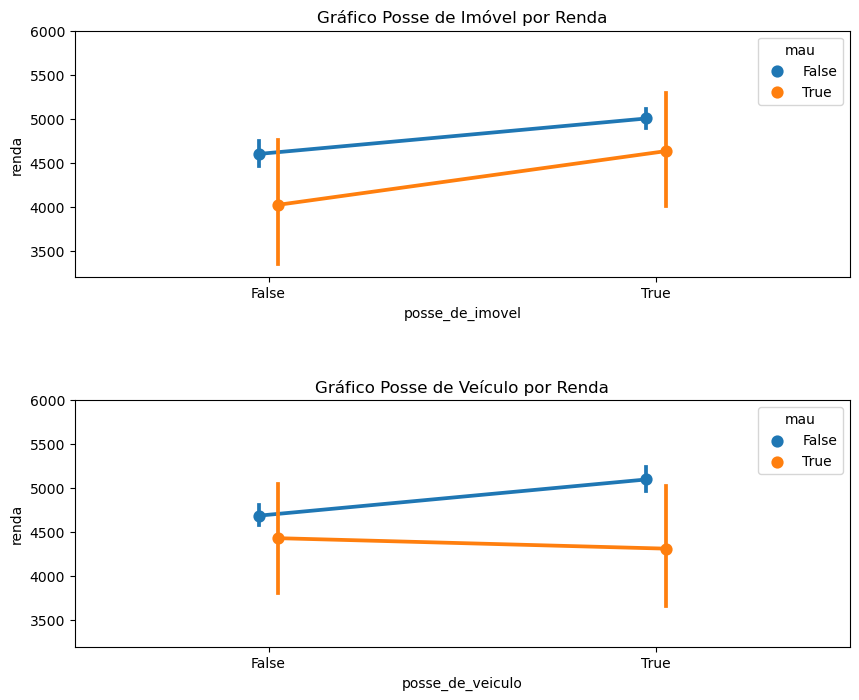

In [190]:
#Gráficos Posse Imóvel e Posse Veículo com relação com a variável mau
fig, ax = plt.subplots(2,1, figsize=(10,8))

imovel = sns.pointplot(x='posse_de_imovel', y='renda',
                       data=previsao_renda_filter, 
                       dodge=True, 
                       errorbar=('ci', 95), 
                       hue='mau',
                       ax= ax[0])

veiculo = sns.pointplot(x='posse_de_veiculo', y='renda',
                        data=previsao_renda_filter, 
                        dodge=True, 
                        errorbar=('ci', 95),
                        hue='mau',
                        ax= ax[1])

imovel.set_title('Gráfico Posse de Imóvel por Renda')
imovel.set_ylim(3200, 6000)
veiculo.set_title('Gráfico Posse de Veículo por Renda')
veiculo.set_ylim(3200, 6000)

plt.subplots_adjust(hspace=0.5)

Ambas as variáveis posse_de_imovel e posse_de_veiculo parecem descriminar a renda de maneira significativa. Pois percebe-se que aqueles que possuem veículo e imóvel, estão na faixa de maior renda, enquanto os que não possuem se encontram sempre na faixa de menor renda. Mesmo para os que são mau pagadores o cenário se repete para a posse de imóvel, mundando apenas para os maus pagadores com posse de veículo, sendo estes os que se encontram na faixa de renda mais baixa.